In [1]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
from scipy.sparse import coo_matrix
from scipy.misc import comb
from munkres import Munkres
from math import log

# MNISTデータを用意

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)

# AutoEncoderを定義

In [4]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    n_stacks = len(dims) - 1
    
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)  # hidden layer, features are extracted from here

    x = encoded
    
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')

# Hyper-params

In [5]:
dims = [x.shape[-1], 500, 500, 2000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in', distribution='uniform')
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = 300
batch_size = 256
save_dir = './results'

In [6]:
autoencoder, encoder = autoencoder(dims, init=init)

# Pretrain auto-encoder

In [7]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')

Epoch 1/300
70000/70000 [==============================] - 27s 392us/step - loss: 0.0646
Epoch 2/300
70000/70000 [==============================] - 25s 361us/step - loss: 0.0440
Epoch 3/300
70000/70000 [==============================] - 26s 365us/step - loss: 0.0316
Epoch 4/300
70000/70000 [==============================] - 25s 364us/step - loss: 0.0266
Epoch 5/300
70000/70000 [==============================] - 25s 364us/step - loss: 0.0242
Epoch 6/300
70000/70000 [==============================] - 26s 368us/step - loss: 0.0226
Epoch 7/300
70000/70000 [==============================] - 25s 360us/step - loss: 0.0214
Epoch 8/300
70000/70000 [==============================] - 25s 360us/step - loss: 0.0205
Epoch 9/300
70000/70000 [==============================] - 26s 365us/step - loss: 0.0197
Epoch 10/300
70000/70000 [==============================] - 26s 370us/step - loss: 0.0191
Epoch 11/300
70000/70000 [==============================] - 25s 364us/step - loss: 0.0186
Epoch 12/300
70000/

70000/70000 [==============================] - 26s 369us/step - loss: 0.0108
Epoch 93/300
70000/70000 [==============================] - 26s 367us/step - loss: 0.0108
Epoch 94/300
70000/70000 [==============================] - 26s 377us/step - loss: 0.0108
Epoch 95/300
70000/70000 [==============================] - 26s 369us/step - loss: 0.0108
Epoch 96/300
70000/70000 [==============================] - 26s 370us/step - loss: 0.0107
Epoch 97/300
70000/70000 [==============================] - 26s 375us/step - loss: 0.0107
Epoch 98/300
70000/70000 [==============================] - 26s 369us/step - loss: 0.0107
Epoch 99/300
70000/70000 [==============================] - 26s 367us/step - loss: 0.0106
Epoch 100/300
70000/70000 [==============================] - 26s 374us/step - loss: 0.0106
Epoch 101/300
70000/70000 [==============================] - 26s 374us/step - loss: 0.0106
Epoch 102/300
70000/70000 [==============================] - 26s 369us/step - loss: 0.0106
Epoch 103/300
70000/

70000/70000 [==============================] - 26s 366us/step - loss: 0.0092
Epoch 183/300
70000/70000 [==============================] - 26s 367us/step - loss: 0.0092
Epoch 184/300
70000/70000 [==============================] - 26s 368us/step - loss: 0.0092
Epoch 185/300
70000/70000 [==============================] - 27s 379us/step - loss: 0.0092
Epoch 186/300
70000/70000 [==============================] - 26s 372us/step - loss: 0.0092
Epoch 187/300
70000/70000 [==============================] - 26s 370us/step - loss: 0.0092
Epoch 188/300
70000/70000 [==============================] - 26s 377us/step - loss: 0.0092
Epoch 189/300
70000/70000 [==============================] - 26s 372us/step - loss: 0.0092
Epoch 190/300
70000/70000 [==============================] - 26s 366us/step - loss: 0.0091
Epoch 191/300
70000/70000 [==============================] - 26s 377us/step - loss: 0.0091
Epoch 192/300
70000/70000 [==============================] - 26s 369us/step - loss: 0.0091
Epoch 193/300

70000/70000 [==============================] - 25s 356us/step - loss: 0.0084
Epoch 273/300
70000/70000 [==============================] - 25s 361us/step - loss: 0.0084
Epoch 274/300
70000/70000 [==============================] - 25s 356us/step - loss: 0.0084
Epoch 275/300
70000/70000 [==============================] - 25s 360us/step - loss: 0.0084
Epoch 276/300
70000/70000 [==============================] - 25s 353us/step - loss: 0.0084
Epoch 277/300
70000/70000 [==============================] - 25s 360us/step - loss: 0.0084
Epoch 278/300
70000/70000 [==============================] - 25s 354us/step - loss: 0.0084
Epoch 279/300
70000/70000 [==============================] - 25s 359us/step - loss: 0.0084
Epoch 280/300
70000/70000 [==============================] - 25s 356us/step - loss: 0.0084
Epoch 281/300
70000/70000 [==============================] - 26s 366us/step - loss: 0.0084
Epoch 282/300
70000/70000 [==============================] - 25s 359us/step - loss: 0.0084
Epoch 283/300

# ClusteringLayerを独自定義

In [8]:
class ClusteringLayer(Layer):
    """
    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight((self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

# DeepClusterモデルの定義

In [9]:
n_clusters = 10
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

### Step 1: k-meansでクラスタ中心を計算し、初期値とする

In [10]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))

In [11]:
# クラスタ番号の結果を保存する
y_pred_last = np.copy(y_pred)

In [12]:
# modelに中心値を格納する
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

### 

In [13]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [14]:
def check_clusterings(labels_true, labels_pred):
    """Check that the two clusterings matching 1D integer arrays"""
    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)

    # input checks
    if labels_true.ndim != 1:
        raise ValueError(
            "labels_true must be 1D: shape is %r" % (labels_true.shape,))
    if labels_pred.ndim != 1:
        raise ValueError(
            "labels_pred must be 1D: shape is %r" % (labels_pred.shape,))
    if labels_true.shape != labels_pred.shape:
        raise ValueError(
            "labels_true and labels_pred must have same size, got %d and %d"
            % (labels_true.shape[0], labels_pred.shape[0]))
    return labels_true, labels_pred

In [15]:
def contingency_matrix(labels_true, labels_pred, eps=None):
    """Build a contengency matrix describing the relationship between labels.
    Parameters
    ----------
    labels_true : int array, shape = [n_samples]
        Ground truth class labels to be used as a reference
    labels_pred : array, shape = [n_samples]
        Cluster labels to evaluate
    eps: None or float
        If a float, that value is added to all values in the contingency
        matrix. This helps to stop NaN propogation.
        If ``None``, nothing is adjusted.
    Returns
    -------
    contingency: array, shape=[n_classes_true, n_classes_pred]
        Matrix :math:`C` such that :math:`C_{i, j}` is the number of samples in
        true class :math:`i` and in predicted class :math:`j`. If
        ``eps is None``, the dtype of this array will be integer. If ``eps`` is
        given, the dtype will be float.
    """
    classes, class_idx = np.unique(labels_true, return_inverse=True)
    clusters, cluster_idx = np.unique(labels_pred, return_inverse=True)
    n_classes = classes.shape[0]
    n_clusters = clusters.shape[0]
    # Using coo_matrix to accelerate simple histogram calculation,
    # i.e. bins are consecutive integers
    # Currently, coo_matrix is faster than histogram2d for simple cases
    contingency = coo_matrix((np.ones(class_idx.shape[0]),
                              (class_idx, cluster_idx)),
                             shape=(n_classes, n_clusters),
                             dtype=np.int).toarray()
    if eps is not None:
        # don't use += as contingency is integer
        contingency = contingency + eps
    return contingency

In [16]:
def mutual_info_score(labels_true, labels_pred, contingency=None):
    """Mutual Information between two clusterings
    See also
    --------
    adjusted_mutual_info_score: Adjusted against chance Mutual Information
    normalized_mutual_info_score: Normalized Mutual Information
    """
    if contingency is None:
        labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
        contingency = contingency_matrix(labels_true, labels_pred)
    contingency = np.array(contingency, dtype='float')
    contingency_sum = np.sum(contingency)
    pi = np.sum(contingency, axis=1)
    pj = np.sum(contingency, axis=0)
    outer = np.outer(pi, pj)
    nnz = contingency != 0.0
    # normalized contingency
    contingency_nm = contingency[nnz]
    log_contingency_nm = np.log(contingency_nm)
    contingency_nm /= contingency_sum
    # log(a / b) should be calculated as log(a) - log(b) for
    # possible loss of precision
    log_outer = -np.log(outer[nnz]) + log(pi.sum()) + log(pj.sum())
    mi = (contingency_nm * (log_contingency_nm - log(contingency_sum))
          + contingency_nm * log_outer)
    return mi.sum()

In [17]:
def entropy(labels):
    """Calculates the entropy for a labeling."""
    if len(labels) == 0:
        return 1.0
    label_idx = np.unique(labels, return_inverse=True)[1]
    pi = np.bincount(label_idx).astype(np.float)
    pi = pi[pi > 0]
    pi_sum = np.sum(pi)
    # log(a / b) should be calculated as log(a) - log(b) for
    # possible loss of precision
    return -np.sum((pi / pi_sum) * (np.log(pi) - log(pi_sum)))

In [18]:
def comb2(n):
    # the exact version is faster for k == 2: use it by default globally in
    # this module instead of the float approximate variant
    return comb(n, 2, exact=1)

In [19]:
def accuracy(labels_true, labels_pred):
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = labels_true.shape[0]
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Special limit cases: no clustering since the data is not split;
    # or trivial clustering where each document is assigned a unique cluster.
    # These are perfect matches hence return 1.0.
    if (classes.shape[0] == clusters.shape[0] == 1
            or classes.shape[0] == clusters.shape[0] == 0
            or classes.shape[0] == clusters.shape[0] == len(labels_true)):
        return 1.0
    
    # print "accuracy testing..."
    contingency = contingency_matrix(labels_true, labels_pred) #Type: <type 'numpy.ndarray'>:rows are clusters, cols are classes
    contingency = -contingency
    #print contingency
    contingency = contingency.tolist()
    m = Munkres() # Best mapping by using Kuhn-Munkres algorithm
    map_pairs = m.compute(contingency) #best match to find the minimum cost
    sum_value = 0
    for key,value in map_pairs:
        sum_value = sum_value + contingency[key][value]
    
    return float(-sum_value)/n_samples

In [20]:
def normalized_mutual_info_score(labels_true, labels_pred):
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Special limit cases: no clustering since the data is not split.
    # This is a perfect match hence return 1.0.
    if (classes.shape[0] == clusters.shape[0] == 1
            or classes.shape[0] == clusters.shape[0] == 0):
        return 1.0
    contingency = contingency_matrix(labels_true, labels_pred)
    contingency = np.array(contingency, dtype='float')
    # Calculate the MI for the two clusterings
    mi = mutual_info_score(labels_true, labels_pred,
                           contingency=contingency)
    # Calculate the expected value for the mutual information
    # Calculate entropy for each labeling
    h_true, h_pred = entropy(labels_true), entropy(labels_pred)
    nmi = mi / max(np.sqrt(h_true * h_pred), 1e-10)
    return nmi

In [21]:
def adjusted_rand_score(labels_true, labels_pred):
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = labels_true.shape[0]
    classes = np.unique(labels_true)
    clusters = np.unique(labels_pred)
    # Special limit cases: no clustering since the data is not split;
    # or trivial clustering where each document is assigned a unique cluster.
    # These are perfect matches hence return 1.0.
    if (classes.shape[0] == clusters.shape[0] == 1
            or classes.shape[0] == clusters.shape[0] == 0
            or classes.shape[0] == clusters.shape[0] == len(labels_true)):
        return 1.0

    contingency = contingency_matrix(labels_true, labels_pred)
    #print contingency
    # Compute the ARI using the contingency data
    #print "contingency.sum(axis=1) = %s" %(str(contingency.sum(axis=1)))
    sum_comb_c = sum(comb2(n_c) for n_c in contingency.sum(axis=1)) # TP+FP
    #print "sum_comb_c = %d" %(sum_comb_c)
    
    #print "contingency.sum(axis=0) = %s" %(str(contingency.sum(axis=0)))
    sum_comb_k = sum(comb2(n_k) for n_k in contingency.sum(axis=0)) #TP+FN
    #print "sum_comb_k = %d" %(sum_comb_k)
    
    #print "contingency.flatten() = %s" %(str(contingency.flatten()))
    sum_comb = sum(comb2(n_ij) for n_ij in contingency.flatten()) #TP
    #print "sum_comb = %d" %(sum_comb)
    
    prod_comb = (sum_comb_c * sum_comb_k) / float(comb(n_samples, 2))
    mean_comb = (sum_comb_k + sum_comb_c) / 2.
    
    return ((sum_comb - prod_comb) / (mean_comb - prod_comb))

# Training

In [22]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x.shape[0])
tol = 0.001 # tolerance threshold to stop training

In [23]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if y is not None:
            acc = np.round(accuracy(y, y_pred), 5)
            nmi = np.round(normalized_mutual_info_score(y, y_pred), 5)
            ari = np.round(adjusted_rand_score(y, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion - model convergence
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_weight_final.h5')
model.save(save_dir + '/DEC_model_final.h5')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


Iter 0: acc = 0.91579, nmi = 0.82454, ari = 0.82112  ; loss= 0
Iter 140: acc = 0.92504, nmi = 0.83702, ari = 0.84110  ; loss= 0
Iter 280: acc = 0.93614, nmi = 0.85539, ari = 0.86427  ; loss= 0
Iter 420: acc = 0.94293, nmi = 0.86730, ari = 0.87847  ; loss= 0
Iter 560: acc = 0.94747, nmi = 0.87552, ari = 0.88803  ; loss= 0
Iter 700: acc = 0.94990, nmi = 0.88014, ari = 0.89313  ; loss= 0
Iter 840: acc = 0.95206, nmi = 0.88420, ari = 0.89761  ; loss= 0
Iter 980: acc = 0.95339, nmi = 0.88680, ari = 0.90039  ; loss= 0
Iter 1120: acc = 0.95446, nmi = 0.88879, ari = 0.90261  ; loss= 0
Iter 1260: acc = 0.95577, nmi = 0.89130, ari = 0.90537  ; loss= 0
Iter 1400: acc = 0.95693, nmi = 0.89342, ari = 0.90779  ; loss= 0
Iter 1540: acc = 0.95686, nmi = 0.89347, ari = 0.90766  ; loss= 0
Iter 1680: acc = 0.95784, nmi = 0.89523, ari = 0.90971  ; loss= 0
Iter 1820: acc = 0.95824, nmi = 0.89607, ari = 0.91054  ; loss= 0
Iter 1960: acc = 0.95893, nmi = 0.89745, ari = 0.91198  ; loss= 0
Iter 2100: acc = 0.9

# Evaluation

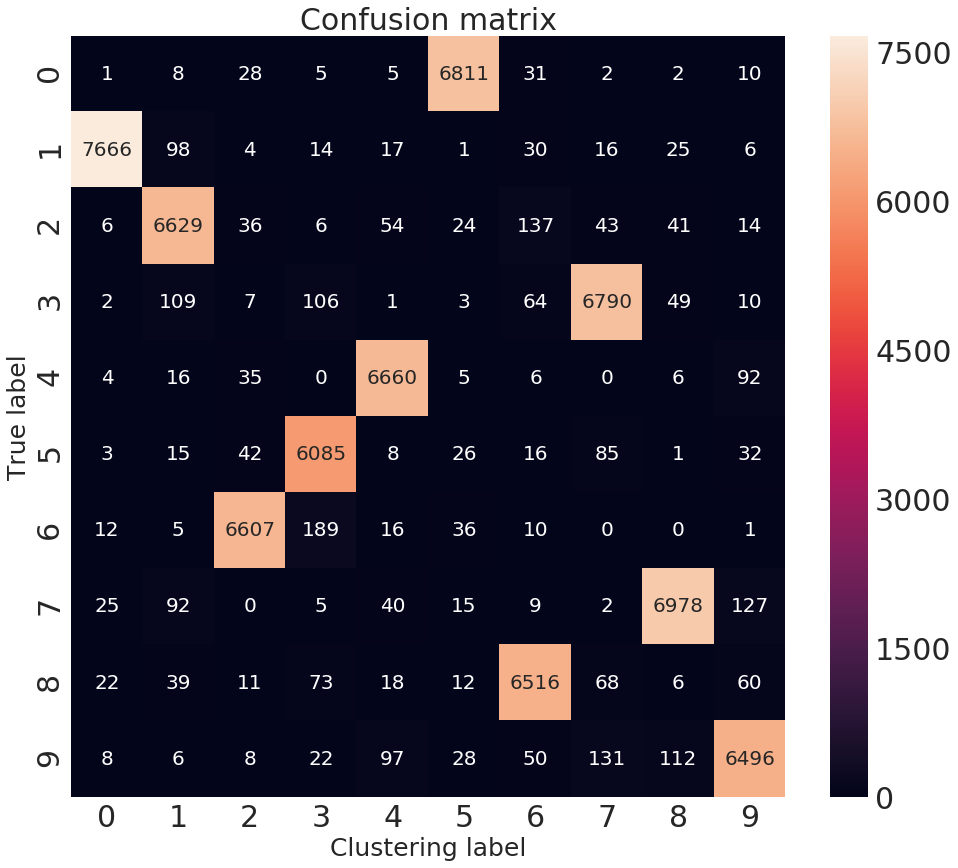

In [25]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()